# RNN 원리
## Numpy로 RNN 원리 구현하기

In [ ]:
import numpy as np

timesteps = 10  # 시점의 개수. - NLP 에서는 보통 문장의 길이
input_dim = 4  # 입력의 차원. 단어 벡터의 차원

hidden_size = 8  # 은닉 유닛의 개수 (메모리 셀의 용량이라고도 한다.)

# 입력 데이터 배열 만들기
inputs = np.random.random((timesteps, input_dim))  # 입력에 해당되는 2D 텐서(임베딩 벡터)  # 미리 준비된 가중치

# 은닉 상태의 크기 hidden_size로 셀의 유닛을 만든다.
hidden_state_t = np.zeros((hidden_size,))

print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 여기까지가 초기화 작업

In [ ]:
# 현 시점 입력을 위한 가중치
Wx = np.random.random((hidden_size, input_dim))  # WX + B 할것이므로 8*4

# 이전 시점에 대한 hidden state도 받아야 함
Wh = np.random.random((hidden_size, hidden_size))  # 8개가 나와서 8개로 다시 들어가니까 8*8

# 편향은 unit 당 1개씩
b = np.random.random((hidden_size,))

print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [ ]:
# 메모리 셀 작동시키기
total_hidden_states = []

# 각 시점에서의 입력값 가져오기
for input_t in inputs:
  # Wx * Xt + Wh * Ht-1 + b
  # 에 tanh를 함
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
  
  total_hidden_states.append(list(output_t))  # 각 시점의 은닉 상태의 값을 계속 축적
  print(np.shape(total_hidden_states))

  hidden_state_t = output_t  # 현재의 output을 다음 시점의 입력으로 삼기 위해 hidden_state_t에 대입

total_hidden_states = np.stack(total_hidden_states, axis=0)
print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.50437618 0.82312786 0.94492988 0.75493014 0.85881298 0.95733396
  0.94493987 0.82129295]
 [0.99941382 0.99714115 0.99938766 0.99815097 0.99815585 0.99969256
  0.99994059 0.99716027]
 [0.99993803 0.99927813 0.99992008 0.99989313 0.99970534 0.9999689
  0.99999615 0.99941452]
 [0.99987273 0.99918978 0.99991878 0.99974392 0.99900714 0.99992976
  0.99998189 0.99895439]
 [0.99995155 0.99933251 0.99992206 0.99991311 0.99971359 0.99996284
  0.99999303 0.99902816]
 [0.99990935 0.99861049 0.99982676 0.99963957 0.99942298 0.99991378
  0.99998378 0.99870225]
 [0.99994972 0.99926814 0.99992181 0.99989352 0.99975621 0.99997381
  0.99999518 0.99934331]
 [0.99994179 0.99951644 0.99996103 0.9999166  0.99973401 0.99998703
  0.99999662 0.99963542]
 [0.99991014 0.99930375 0.99993444 0.99984968 0.99956771 0.99997223
  0.99999587 0.99956238]
 [0.99990512 0.9993499  0.9999337  0.99985426 0.99933372 0.9999496
  0.99998935 0.99911933]]


# Tensorflow로 Vanilla RNN 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))  # 3 -> hidden_state 갯수
                                             # input_shape -> input_length = 2, input_dim = 10
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


# 은닉층이 2개인 순환 신경망

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences=True))  # 각 timestep 마다 y를 리턴해준다.
# many-to-many 기법을 활용할 때는 return_sequences=True 사용
# return_sequences=False -> 맨 마지막 출력에서만 y 리턴
model.add(SimpleRNN(hidden_size, return_sequences=True))

# 양방향 순환 신경망

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))

# 깊은 양방향 순환 신경망

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
# 맨 처음 입력을 input_shape를 받고 그 뒤는 안 적어도 됨
# 은닉층이 3개

In [ ]:
# return_sequences=True 의 의미 파악 중요

# LSTM 구현하기

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(timesteps, input_dim)))
# 나중에는 문장의 길이가 timesteps 에 들어감

# Text Classification (English)
1. 로이터 뉴스 분류
- X : 뉴스 기사 내용
- y : 뉴스 카테고리

In [ ]:
# 출력값이 많은 다중 분류

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
print("X_train 형상 : {}".format(X_train.shape))
print("y_train 형상 : {}".format(y_train.shape))

X_train 형상 : (8982,)
y_train 형상 : (8982,)


In [ ]:
X_train[0]  # X는 정수 인코딩이 되어있다.

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
len(X_train[0]), len(X_train[1])

(87, 56)

In [ ]:
# 기사마다 단어의 갯수는 다르다.

# 패딩 작업 필요할 것 같다.

# 텍스트는 문장의 길이 고려 필요

# 최대 길이를 몇으로 놓을까?

# 너무 긴 문장, 너무 짧은 문장에 대한 조치는 어떻게?

# 긴 문장이 많으면 거기에 맞추고 짧은 문장이 많으면 거기에 맞춰야 한다
# 시각화 필요

In [ ]:
y_train[0]

3

In [ ]:
# 넘버링화 되어있다는 걸 알 수 있다
# 원핫인코딩이 되어있지 않다

# MNIST 데이터에서는 숫자니까 레이블이 10개인것 알았는 데
# 지금은 레이블의 범위를 알지 못한다.

In [ ]:
# num_classes 알아내기
min(y_train), max(y_train)

(0, 45)

In [ ]:
# 레이블 범위가 0~45이다.

In [ ]:
num_classes = max(y_train) + 1
# 총 레이블 갯수 46개

In [ ]:
# 불안하면 unique 로 값 전부 확인한다음에
# 0~45가 다 있는 것 확인하고 46개로 지정해도 된다.

1. X_train 자체가 정수 인코딩이 되어있다.
2. y는 OHE이 되어있지 않은 label 형태로 설정되어있다.
3. 클래스의 갯수(카테고리 갯수)는 46개이다.

## 데이터 살펴보기(시각화)
1. 문장 길이에 대한 시각화를 해보자.
- 입력값의 크기 설정을 해야하므로
- padding을 설정해야 하기 때문에

In [ ]:
print("뉴스 기사의 최대 길이 : {}".format(max(len(l) for l in X_train)))
print("뉴스 기사의 평균 길이 : {}".format(sum(map(len, X_train)) / len(X_train)))

뉴스 기사의 최대 길이 : 2376
뉴스 기사의 평균 길이 : 145.5398574927633


In [ ]:
# map(함수, 배열)
# 배열 안의 원소 하나하나를 꺼내서 길이를 잰다.

In [ ]:
# 빈도수 필요
# 너무 긴 문장은 잘라버리고 너무 짧은 문장에 패딩을 할 거기 때문에

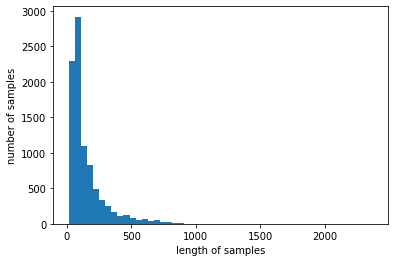

In [ ]:
plt.hist([len(s) for s in X_train], bins=50)

plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


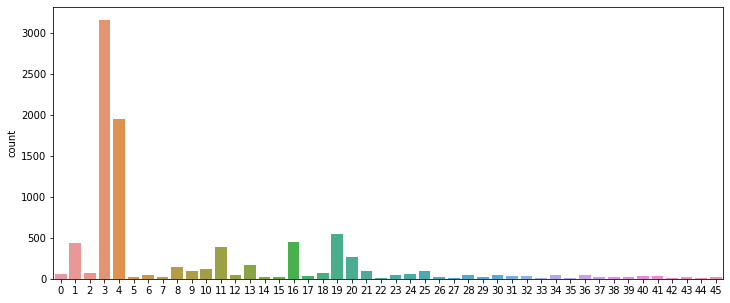

In [ ]:
# 레이블의 빈도도 확인해보자
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)
plt.show()

## 단어사전 확인 및 전처리 수행하기

In [ ]:
# 임베딩 데이터 확인
word_to_index = reuters.get_word_index()
print(word_to_index)

557056/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [ ]:
# 단어 : index

In [ ]:
# 숫자를 문자로 바꿔야 하니까 index_to_word로 새로 만들자
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value] = key

In [ ]:
print(index_to_word)

{10996: 'mdbl', 16260: 'fawc', 12089: 'degussa', 8803: 'woods', 13796: 'hanging', 20672: 'localized', 20673: 'sation', 20675: 'chanthaburi', 10997: 'refunding', 8804: 'hermann', 20676: 'passsengers', 20677: 'stipulate', 8352: 'heublein', 20713: 'screaming', 16261: 'tcby', 185: 'four', 1642: 'grains', 20680: 'broiler', 12090: 'wooden', 1220: 'wednesday', 13797: 'highveld', 7593: 'duffour', 20681: '0053', 3914: 'elections', 2563: '270', 3551: '271', 5113: '272', 3552: '273', 3400: '274', 7975: 'rudman', 3401: '276', 3478: '277', 3632: '278', 4309: '279', 9381: 'dormancy', 7247: 'errors', 3086: 'deferred', 20683: 'sptnd', 8805: 'cooking', 20684: 'stratabit', 16262: 'designing', 20685: 'metalurgicos', 13798: 'databank', 20686: '300er', 20687: 'shocks', 7972: 'nawg', 20688: 'tnta', 20689: 'perforations', 2891: 'affiliates', 20690: '27p', 16263: 'ching', 595: 'china', 16264: 'wagyu', 3189: 'affiliated', 16265: 'chino', 16266: 'chinh', 20692: 'slickline', 13799: 'doldrums', 12092: 'kids', 302

In [ ]:
# index_to_word를 사전으로 활용할 것이다.

In [ ]:
# UNK, padding 토큰이 없음

# 뉴스기사 - 문단.
# 지난번까지는 문장.

# UNK, padding, 뉴스 기사가 여기서부터 시작된다.를 알려주는 시작부분을 표시(start of sentence. SOS), 끝나는 부분(end of sentence. EOS) 토큰이 있음
# 우리는 UNK, padding, SOS 토큰을 추가해줄 것이다.

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token
print(" ".join([index_to_word[index] for index in X_train[0]]))
# 0번을 <pad>, 1번을 <sos>, 2번을 <unk> 로 하는 이유?
# 단어 사전에 0,1,2번을 사용하는 지 안 하는지 봐야하지 않나?
# 이 데이터의 단어 사전에 0,1,2번이 없다는 것을 이미 알고 있다.
# 정석대로라면 0,1,2번이 있는 지 확인해야 함

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [ ]:
# 첫 번째 뉴스 기사를 정수 인코딩으로 다시 바꿔본 결과

In [ ]:
print(index_to_word)

{10996: 'mdbl', 16260: 'fawc', 12089: 'degussa', 8803: 'woods', 13796: 'hanging', 20672: 'localized', 20673: 'sation', 20675: 'chanthaburi', 10997: 'refunding', 8804: 'hermann', 20676: 'passsengers', 20677: 'stipulate', 8352: 'heublein', 20713: 'screaming', 16261: 'tcby', 185: 'four', 1642: 'grains', 20680: 'broiler', 12090: 'wooden', 1220: 'wednesday', 13797: 'highveld', 7593: 'duffour', 20681: '0053', 3914: 'elections', 2563: '270', 3551: '271', 5113: '272', 3552: '273', 3400: '274', 7975: 'rudman', 3401: '276', 3478: '277', 3632: '278', 4309: '279', 9381: 'dormancy', 7247: 'errors', 3086: 'deferred', 20683: 'sptnd', 8805: 'cooking', 20684: 'stratabit', 16262: 'designing', 20685: 'metalurgicos', 13798: 'databank', 20686: '300er', 20687: 'shocks', 7972: 'nawg', 20688: 'tnta', 20689: 'perforations', 2891: 'affiliates', 20690: '27p', 16263: 'ching', 595: 'china', 16264: 'wagyu', 3189: 'affiliated', 16265: 'chino', 16266: 'chinh', 20692: 'slickline', 13799: 'doldrums', 12092: 'kids', 302

## 모델 설계하기

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [ ]:
max_len = 100  # 사용할 문장의 최대 길이  # 위의 시각화 그림에서 제일 갯수가 많을 때의 문장의 길이가 100이라서 100으로 지정
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
# 문장의 길이가 100이 안되면 0으로 패딩. 채워준다.
# 100이 넘어가면 잘라준다.
X_train.shape, X_test.shape

((8982, 100), (2246, 100))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

- 최대 사용할 단어의 갯수 : 1000개(load_data할 때 num_words)
- 최대 사용할 문장의 길이 : 100

In [ ]:
vocab_size = 1000  # 최대 사용할 단어의 갯수
input_dim = 120  # 내 마음대로 설정.  # 임베딩 차원의 수
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, input_dim))
model.add(LSTM(120))
model.add(Dense(46, activation="softmax"))

In [ ]:
# 콜백 모듈 -> 1 에폭당 실행시킬 기능
# 1에폭 : 가지고 있는 전체 데이터 1번 보는 것
# 1에폭당 -> 학습 1회당

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=4)
mc = ModelCheckpoint("best_model.h5",
                     monitor="val_acc",
                     mode="max",
                     verbose=1,
                     save_best_only=True)

In [ ]:
# val_loss를 보겠다.
# verbose : 로그 레벨
# patience : 4번 참고 5번째에는 중단하겠다.
# modelchceckpoint : 제일 성능이 좋았던 시점의 가중치를 저장

In [ ]:
# 모델 컴파일
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["acc"]
)

In [ ]:
# 훈련
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    callbacks=[es, mc],
    validation_data=(X_test, y_test)  # 원래는 이러면 안됨. train 분할해야함
)

Epoch 1/30
68/71 [===========================>..] - ETA: 0s - loss: 2.6128 - acc: 0.3401
Epoch 00001: val_acc improved from -inf to 0.47061, saving model to best_model.h5
71/71 [==============================] - 2s 22ms/step - loss: 2.6001 - acc: 0.3440 - val_loss: 2.1672 - val_acc: 0.4706
Epoch 2/30
68/71 [===========================>..] - ETA: 0s - loss: 2.0585 - acc: 0.4836
Epoch 00002: val_acc improved from 0.47061 to 0.50178, saving model to best_model.h5
71/71 [==============================] - 1s 14ms/step - loss: 2.0593 - acc: 0.4831 - val_loss: 1.9776 - val_acc: 0.5018
Epoch 3/30
69/71 [============================>.] - ETA: 0s - loss: 1.8254 - acc: 0.5284
Epoch 00003: val_acc improved from 0.50178 to 0.54720, saving model to best_model.h5
71/71 [==============================] - 1s 15ms/step - loss: 1.8234 - acc: 0.5289 - val_loss: 1.7457 - val_acc: 0.5472
Epoch 4/30
67/71 [===========================>..] - ETA: 0s - loss: 1.7180 - acc: 0.5542
Epoch 00004: val_acc improved fr

In [ ]:
# 코랩에서 모델링, 다른 곳에서 API 지원할 때
# 왼쪽 폴더 best_model.h5 이렇게 저장하고 다운로드 받으면 됨

In [ ]:
# 모델을 파일로부터 불러오기
loaded_model = load_model("best_model.h5")
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.1724 - acc: 0.7244

 테스트 정확도 : 0.7244


# 결과 시각화

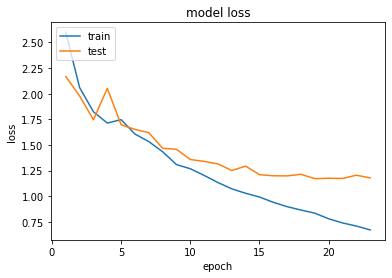

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 네이버 영화 리뷰 분류하기
## 네이버 영화 리뷰 전처리하기

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 11.6MB/s 
     |████████████████████████████████| 460kB 51.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f1554559780>)

In [ ]:
train_data = pd.read_table("ratings_train.txt")
test_data = pd.read_table("ratings_test.txt")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
# test 데이터 : 10만개
# train 데이터 : 5만개

## 데이터 분석

In [ ]:
train_data["document"].nunique(), test_data["label"].nunique()

(146182, 2)

In [ ]:
# 중복 제거
train_data.drop_duplicates(subset=["document"], inplace=True)  # inplace : 지금 데이터에 바로 적용

In [ ]:
# 데이터를 변화시킬 때, 단위 변환, 컬럼 추가.. -> inplace 사용하지 않고 백업함
# 백업이 필요한 순간 -> inplace 사용하지 않고 copy() 쓰거나 새로운 변수로

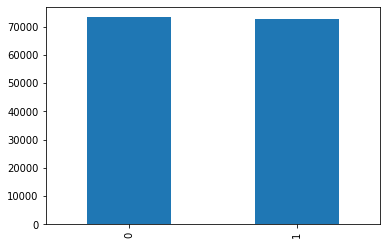

In [ ]:
# label의 비율도 확인
train_data["label"].value_counts().plot(kind="bar")

In [ ]:
# 클래스의 비율이 비슷함
# 이런 게 제일 이상적이다.
# 레이블의 비율이 비등한 것이 제일 이상적인 수치

In [ ]:
train_data = train_data.dropna(how="any")  # NaN값 제거
print(train_data.isnull().values.any())  # NaN 값 확인

False


In [ ]:
print(len(train_data))

146182


In [ ]:
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")  # 띄어쓰기도 정규식 조건에 넣음
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
train_data["document"].replace("", np.nan, inplace=True)
train_data = train_data.dropna(how="any")

print(len(train_data))

145791


In [ ]:
# test data cleaning
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거

In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
from konlpy.tag import Okt
okt = Okt()

X_train = []
for sentence in train_data["document"]:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)  # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
  X_train.append(temp_X)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

X_test = []
for sentence in test_data["document"]:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)  # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
  X_test.append(temp_X)

In [ ]:
# 토큰화 끝났으면 정수 인코딩을 해야한다.

## 토크나이저 만들기

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '것': 25, '평점': 26, '내': 27, '최고': 28, '그': 29, '나': 30, '안': 31, '인': 32, '스토리': 33, '생각': 34, '못': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '이렇다': 42, '말': 43, '고': 44, '아깝다': 45, '더': 46, '배우': 47, '때': 48, 'ㅋㅋ': 49, '아': 50, '감독': 51, '거': 52, '그냥': 53, '재미있다': 54, '요': 55, '재미': 56, '시간': 57, '내용': 58, '뭐': 59, '까지': 60, '중': 61, '주다': 62, '자다': 63, '하고': 64, '지루하다': 65, '재미없다': 66, '쓰레기': 67, '수': 68, '네': 69, '모르다': 70, '가다': 71, '들다': 72, '그렇다': 73, '싶다': 74, '지': 75, '작품': 76, '사랑': 77, '알다': 78, '하나': 79, '다시': 80, '마지막': 81, '볼': 82, '이건': 83, '정도': 84, '저': 85, '완전': 86, '오다': 87, 'ㅋ': 88, 'ㅠㅠ': 89, '많다': 90, '처음': 91, 'ㅋㅋㅋ': 92, '장면': 93, '액션': 94, '주인공': 95, '이렇게': 96, '안되다': 97, '걸': 98, '차다': 99, '나다': 100, '개': 101, '하': 1

In [ ]:
len(tokenizer.word_index)

43752

In [ ]:
# 토큰이 43752개가 있다.

뒤로 갈수록 빈도수가 적은 단어이다. 빈도수가 3 이상인 단어만 사용하기로 함

In [ ]:
threshold = 3  # 임계점. 적어도 3회는 넘어야 한다는 의미.
total_cnt = len(tokenizer.word_index)
# 3회를 안넘는 단어의 비중도 보면 좋을 듯

rare_cnt = 0  # 등장 빈도가 threshold보다 작은 단어의 갯수를 카운트
total_freq = 0  # 훈련 데이터의 전체 단어 빈도수 총합

rare_freq = 0  # 등장 빈도수가 threshold보다 적은 단어의 등장 빈도수의 총합

for key, value in tokenizer.word_counts.items():
  # 단어, 단어 등장 빈도수 나옴
  total_freq = total_freq + value

  if value < threshold:
    rare_cnt += 1  # 최소 단어의 갯수
    rare_freq = rare_freq + value  # 희소 단어의 등장 빈도의 총 합

print("단어 집합의 크기 : ", total_cnt)
print("등장 빈도가 2번 이하인 회귀 단어의 수 : ", rare_cnt)
print("단어 집합에서 희귀 단어의 비율 : ", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 회귀 단어 등장 빈도 비율 : ", (rare_freq / total_freq) * 100)

단어 집합의 크기 :  43752
등장 빈도가 2번 이하인 회귀 단어의 수 :  24337
단어 집합에서 희귀 단어의 비율 :  55.62488571950996
전체 등장 빈도에서 회귀 단어 등장 빈도 비율 :  1.8715872104872904


In [ ]:
# 희귀 단어 -> 사람들이 많이 안 쓰는 단어
# 근데 희귀 단어 제거하면 56%를 날린다.

# 희귀 단어, 신조어 -> 리뷰에 많은 영향은 끼치지는 않음.
# 그런데 등장 빈도수가 3회보다 적은 경우를 제거하기로 기준잡음.

In [ ]:
# 희귀 단어를 제외한 나머지 단어를 토대로 vocab_size 조절
vocab_size = total_cnt - rare_cnt + 2  # +2 를 해주는 이유 : OOV, padding 토큰 고려
# 근데 왜 SOS는 고려 안 함?
# SOS까지 고려하면 +3
# 이유?
# 문단이 아니라서. 한 줄 리뷰이기 때문에.
# 근데 문단, 논문 같이 문단인 경우에는 SOS 필요
print(vocab_size)

19417


In [ ]:
# 이걸 토대로 토크나이저를 새롭게 만들자.
tokenizer = Tokenizer(vocab_size, oov_token = "OOV")
tokenizer.fit_on_texts(X_train)

In [ ]:
# 43752개 중에서 19417개만 사용

# 아까 빈도수를 구한 건 기준을 정하기 위해서
# 희귀 단어는 최대한 없앨수록 좋음

# 여태까지 짠 코드는 희귀 단어를 알기 위한 코드

## 정수 인코딩

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[51, 455, 17, 261, 660], [934, 458, 42, 603, 2, 215, 1450, 25, 962, 676, 20], [387, 2445, 1, 2316, 5672, 3, 223, 10]]


In [ ]:
# 정수 제대로 들어간 것 확인

In [ ]:
# 비어있는 문자열이 들어있는 인덱스 알아내기
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# index : 인덱스 나옴
# sentence : 정수인코딩된 배열 나옴

# 길이가 1보다 작은. 0인. 즉, 비어있는 문자열인 것

In [ ]:
# label 시리즈도 numpy 배열로 만들어 주자
y_train = np.array(train_data["label"])
y_test = np.array(test_data["label"])

In [ ]:
# 빈 샘플들 삭제
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

In [ ]:
print(len(X_train))
print(len(y_train))

145380
145380


In [ ]:
# 예전에는 정수인코딩을 하기 전에 삭제했었는 데
# 이번에는 정수인코딩을 한 후 삭제를 해봤음

In [ ]:
# 패딩을 해야하는데
# 그러기 위해서는 문장의 길이 수 시각화해보자.

## 패딩 설정하기

In [ ]:
print("리뷰의 최대 길이 : ", max(len(l) for l in X_train))
print("리뷰의 평균 길이 : ", sum(map(len, X_train)) / len(X_train))

리뷰의 최대 길이 :  72
리뷰의 평균 길이 :  11.002187371027652


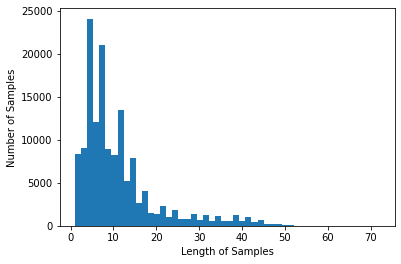

In [ ]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel("Length of Samples")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# 패딩을 할 길이를 설정해야하는데 몇이 좋을까?
# 30정도로 잡고 그 뒤는 잘리더라도 30까지정도면 의미있는 결과가 나오지 않을까?

padding을 30개로 하기로 생각함 -> 단어의 길이가 30개 이하인 샘플이 몇개인지를 조사할건데 혹시 모르니까 40, 50개일 때의 샘플의 비율도 같이 조사

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if len(s) <= max_len:
      cnt = cnt + 1
  
  print("전체 샘플 중 길이가 {} 이하인 샘플의 비율 : {}".format(max_len, (cnt / len(nested_list) * 100)))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)
below_threshold_len(40, X_train)
below_threshold_len(50, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율 : 94.0830925849498
전체 샘플 중 길이가 40 이하인 샘플의 비율 : 98.08501857201816
전체 샘플 중 길이가 50 이하인 샘플의 비율 : 99.91126702434998


In [ ]:
# 5%정도 날려도 괜찮으면 30사용
# 1%만 날리고 싶으면 40이나 50사용

In [ ]:
# 패딩 적용 (max_len = 30)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print(X_train[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   51  455   17
   261  660]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  934  458   42  603    2  215 1450   25  962
   676   20]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  387 2445    1 2316 5672    3
   223   10]]


In [ ]:
# 앞쪽에 패딩이 들어감
# 패딩의 기본은 pre-padding

# 뒤쪽에 넣는 방법도 있는데
# 사실 패딩을 앞/뒤 어디에 넣든 동일함

## LSTM으로 네이버 리뷰 분류하기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))  # 단어의 갯수, 임베딩 차원수(자기 마음대로)
# 매개변수 순서, 의미 중요! 잘 이해하기!
model.add(LSTM(128))  # 임베딩 차원수와 맞지 않아도 된다.

# sigmoid -> 몇프로의 확률로 긍정이다.
# 또는 몇프로의 확률로 부정이다.
# 이렇게 나옴

# softmax -> (몇프로의 확률로 긍정, 몇프로의 확률로 부정)
# 이렇게 나옴

# sigmoid 가 출력층에 충분히 사용가능
model.add(Dense(1, activation="sigmoid"))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # crossentropy : 분류문제에 뛰어난 성능을 보인다.
    metrics=["acc"]
)
history = model.fit(X_train, y_train,
                    epochs=15,
                    callbacks=[es, mc],
                    batch_size = 128,
                    validation_split = 0.2)  # train 데이터의 20%를 검증 데이터로 쓰겠다.

Epoch 1/15
907/909 [============================>.] - ETA: 0s - loss: 0.3940 - acc: 0.8202
Epoch 00001: val_acc improved from -inf to 0.84561, saving model to best_model.h5
909/909 [==============================] - 23s 25ms/step - loss: 0.3941 - acc: 0.8202 - val_loss: 0.3548 - val_acc: 0.8456
Epoch 2/15
908/909 [============================>.] - ETA: 0s - loss: 0.3051 - acc: 0.8688
Epoch 00002: val_acc improved from 0.84561 to 0.85087, saving model to best_model.h5
909/909 [==============================] - 23s 25ms/step - loss: 0.3051 - acc: 0.8688 - val_loss: 0.3480 - val_acc: 0.8509
Epoch 3/15
909/909 [==============================] - ETA: 0s - loss: 0.2552 - acc: 0.8922
Epoch 00003: val_acc did not improve from 0.85087
909/909 [==============================] - 22s 25ms/step - loss: 0.2552 - acc: 0.8922 - val_loss: 0.3581 - val_acc: 0.8496
Epoch 4/15
907/909 [============================>.] - ETA: 0s - loss: 0.2143 - acc: 0.9114
Epoch 00004: val_acc did not improve from 0.85087


In [ ]:
# 테스트 데이터 세트 평가
print("\n 테스트 정확도 : {:.4f}".format(model.evaluate(X_test, y_test)[1]))

1532/1532 [==============================] - 5s 3ms/step - loss: 0.4941 - acc: 0.8325

 테스트 정확도 : 0.8325


In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'OOV': 1, '영화': 2, '보다': 3, '을': 4, '없다': 5, '이다': 6, '있다': 7, '좋다': 8, '너무': 9, '다': 10, '정말': 11, '되다': 12, '재밌다': 13, '적': 14, '만': 15, '같다': 16, '진짜': 17, '로': 18, '아니다': 19, '않다': 20, '점': 21, '에서': 22, '만들다': 23, '나오다': 24, '연기': 25, '것': 26, '평점': 27, '내': 28, '최고': 29, '그': 30, '나': 31, '안': 32, '인': 33, '스토리': 34, '생각': 35, '못': 36, '왜': 37, '드라마': 38, '게': 39, '감동': 40, '사람': 41, '보고': 42, '이렇다': 43, '말': 44, '고': 45, '아깝다': 46, '더': 47, '배우': 48, '때': 49, 'ㅋㅋ': 50, '아': 51, '감독': 52, '거': 53, '그냥': 54, '재미있다': 55, '요': 56, '재미': 57, '시간': 58, '내용': 59, '뭐': 60, '까지': 61, '중': 62, '주다': 63, '자다': 64, '하고': 65, '지루하다': 66, '재미없다': 67, '쓰레기': 68, '수': 69, '네': 70, '모르다': 71, '가다': 72, '들다': 73, '그렇다': 74, '싶다': 75, '지': 76, '작품': 77, '사랑': 78, '알다': 79, '하나': 80, '다시': 81, '마지막': 82, '볼': 83, '이건': 84, '정도': 85, '저': 86, '완전': 87, '오다': 88, 'ㅋ': 89, 'ㅠㅠ': 90, '많다': 91, '처음': 92, 'ㅋㅋㅋ': 93, '장면': 94, '액션': 95, '주인공': 96, '이렇게': 97, '안되다': 98, '걸': 99, '차다': 100, '나다': 101, '개':

## 최종 테스트!

In [ ]:
def sentiment_predict(new_sentence):  # 감성 예측.(긍/부정 판단)
  new_sentence = okt.morphs(new_sentence, stem=True)  # 토큰화
  new_sentence = [ word for word in new_sentence if not word in stopwords]  # 불용어 처리

  # 정수 인코딩
  encoded = tokenizer.texts_to_sequences([new_sentence])

  # 패딩
  pad_new = pad_sequences(encoded, maxlen=max_len)

  score = float(model.predict(pad_new))

  if score > 0.5:
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict("오늘 수업 진짜 재미있지 않았어요?")

61.39% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict("오늘 수업 진짜 재미있었죠?")

91.15% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict("그래픽은 괜찮았는데 음악이 약간 별로였어요")

64.68% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict("그래픽은 정말 괜찮았는데 음악이 구림")

99.72% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict("와개쩐다 ㅋㅋㅋ")

83.57% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict("이 영화 나만보기 아쉽다 다른 사람들도 다 봤으면 좋겠다")

77.12% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict("감독 뭐하는 사람이야?")

87.70% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict("조만간 명절날에 보겠네ㅋㅋㅋㅋ")

99.68% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict("이걸 보고 불면증이 나았습니다.")

85.92% 확률로 부정 리뷰입니다.


## CNN으로 텍스트 분류하기

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# 임베딩 차원, dropout 비율, 필터 갯수 정하기
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
X_train.shape
# 30개씩 14만개가 있음
# 임베딩이 아니라 패딩한게 30개

# 14만개가 전체이고 배치로 놓고 봄

(145380, 30)

In [ ]:
model_input = Input(shape = (max_len,)) 
# shape 정하는 방식 LSTM과 다름.. 임베딩은 동일.
# 30차원의 배치로 만듦
net = Embedding(vocab_size, embedding_dim, input_length=max_len, name="embedding")(model_input)
# 30개씩 받아서 임베딩
# vocab_size, embedding_dim : 모양
# input_length=max_len : 들어와서 받을 형상
# 30개씩 받은 후 모양대로.. 최대 길이..
net = Dropout(dropout_prob[0])(net)

In [ ]:
# 합성곱 연산 수행
conv_blocks = [] # 합성곱 - 풀링 - 평탄화 까지 진행한 블록들을 모아놓을 리스트
# 1차원 배열로 만들어놔야지 나중에 concatenate 할 때 문제가 없음. 그래서 평탄화 하는 것.

filters = [3, 4, 5]

for size in filters:
  conv = Conv1D(filters=num_filters,
                kernel_size=size,
                padding='valid',
                activation='relu',
                strides=1)(net)
# 임베딩까지 완료된 내용이 들어감.

# 훈련을 하면서 임베딩 역할이 하는 역할? X_train 안쪽에 정수인코딩된 내용이 들어있음
# 원핫벡터로 바뀜
# 그럼 그 원핫벡터에 바뀐 임베딩 레이어 통과하면 프로젝션 레이어
# 이 작업을 임베딩 레이어가 다 해줌
# vocab size가 다 들어오는 게 아니라 훈련된 원핫벡터에 맞는 프로젝션 레이어를 통과. 그 문장에 맞는 임베딩 레이어만. 투사층.

# 문장 하나하나마다 합성곱 결과가 나옴

  conv = GlobalMaxPooling1D()(conv)
  # 풀링
  conv = Flatten()(conv)
  # 플래튼을 하는 이유?
  # 임베딩 레이어는 2차원
  # 평평하게 펼쳐줘야 함
  conv_blocks.append(conv)
  # 합성곱 결과 자체가 2차원 배열. 그러니까 평탄화 작업 필요

# 이제 concatenate해줘야 함
net = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# 뒤의 조건문 부분 : 예외처리 부분
# 혹시 길이가 0이면 추가되면 안되니까
# 길이가 1보다 큰 것

# 들어온 문장이 공백 문장이면 들어가면 안되니까 예외처리
net = Dropout(dropout_prob[1])(net)

# Fully Connected
# 합성곱 작업 다 끝났으니까 이제 fully-connected로 후처리
net = Dense(128, activation='relu')(net)

# 출력층 설계
model_output = Dense(1, activation='sigmoid')(net)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 128)      2485376     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 28, 128)      49280       dropout[0][0]                    
_______________________________________________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.fit(X_train, y_train,
          batch_size = 64,
          epochs=10,
          validation_data = (X_test, y_test),
          verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 00001: val_acc improved from -inf to 0.83804, saving model to CNN_model.h5
2272/2272 - 55s - loss: 0.4252 - acc: 0.7980 - val_loss: 0.3637 - val_acc: 0.8380
Epoch 2/10

Epoch 00002: val_acc improved from 0.83804 to 0.84307, saving model to CNN_model.h5
2272/2272 - 54s - loss: 0.3449 - acc: 0.8522 - val_loss: 0.3600 - val_acc: 0.8431
Epoch 3/10

Epoch 00003: val_acc improved from 0.84307 to 0.84337, saving model to CNN_model.h5
2272/2272 - 54s - loss: 0.3158 - acc: 0.8663 - val_loss: 0.3657 - val_acc: 0.8434
Epoch 4/10

Epoch 00004: val_acc did not improve from 0.84337
2272/2272 - 54s - loss: 0.2943 - acc: 0.8774 - val_loss: 0.3598 - val_acc: 0.8430
Epoch 5/10

Epoch 00005: val_acc did not improve from 0.84337
2272/2272 - 54s - loss: 0.2749 - acc: 0.8862 - val_loss: 0.3614 - val_acc: 0.8410
Epoch 6/10

Epoch 00006: val_acc did not improve from 0.84337
2272/2272 - 54s - loss: 0.2625 - acc: 0.8919 - val_loss: 0.3687 - val_acc: 0.8408
Epoch 7/10

Epoch 00007: val_acc did 

In [ ]:
sentiment_predict("이 영화 개꿀잼ㅋㅋ")

91.50% 확률로 긍정 리뷰입니다.
